In [1]:
%load_ext nb_black

import torch_pba
import anndata
import cellplots as cp
import larry
import annoyance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

larry_cmap = larry.pl.InVitroColorMap()._dict

adata = anndata.read_h5ad(
    "../data/KleinLabData/in_vitro/adata.Weinreb2020.in_vitro.task_02.fate_prediction.h5ad"
)

adata_train = adata[adata.obs["train"]].copy()
print(adata_train)

AnnData object with n_obs × n_vars = 74060 × 2447
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train', 'test'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_scaled'


<IPython.core.display.Javascript object>

In [2]:
F_obs_cls = larry.tasks.fate_prediction.F_obs(adata)
F_obs = F_obs_cls.df

- [ INFO ] | Added lineage x fate counts to: adata.uns['fate_counts']
- [ INFO ] | Added lineage-time occupance to: adata.uns['time_occupance']
- [ INFO ] | Fated cells annotated at: adata.obs['fate_observed']
- [ INFO ] | Fated cells (t=t0) annotated at: adata.obs['t0_fated']
- [ INFO ] | Added cell x fate counts to: adata.obsm['cell_fate_df']


<IPython.core.display.Javascript object>

In [36]:
import time


def print_dt(t0):
    now = time.time()
    hours, rem = divmod(now - t0, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}h:{:0>2}m:{:05.2f}s".format(int(hours), int(minutes), seconds))

<IPython.core.display.Javascript object>

In [16]:
adata_test = compose_test_adata(adata)

<IPython.core.display.Javascript object>

In [41]:
import pathlib

<IPython.core.display.Javascript object>

In [46]:
n_seeds = 15
N = 20_000

start = time.time()

count = 0

for i in range(n_seeds):

    F_hat_path = pathlib.Path(f"PBA.F_hat.29SEPT2023.seed_{i}.{N}_cells.csv")
    F_hat_unfilt_path = pathlib.Path(
        f"PBA.F_hat_unfilt.29SEPT2023.seed_{i}.{N}_cells.csv"
    )
    exists = all([F_hat_path.exists(), F_hat_unfilt_path.exists()])
    
    if exists or count >= 5:
        continue
    else:
        try:
            seed_start = time.time()
            np.random.seed(i)
            
            adata_train_subset = torch_pba.ut.downsample(adata_train, N=N)
            torch_pba.tl.configure_R(adata_train_subset)
            pba = torch_pba.PBA(adata_train_subset)
            pba()
            print_dt(t0=start)
            print_dt(t0=seed_start)
            F_hat, F_hat_unfilt = process_f_hat(pba.adata, adata_test)
            F_hat.to_csv(F_hat_path)
            F_hat.to_csv(F_hat_unfilt_path)
            
            count += 1
        except:
            continue

 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 895.594s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 882.759s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
00h:32m:46.01s
00h:16m:21.07s
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 894.470s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
00h:49m:33.55s
00h:16m:42.16s
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 918.952s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
01h:07m:03.92s
00h:16m:55.17s
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 904.473s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
01h:23m:39.05s
00h:16m:31.34s
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 907.290s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
Error in callback <bound method BlackFormatter.format_cell of <lab_black.BlackFormatter object at 0x7fac2856c400>> (for post_run_cell):



KeyboardInterrupt



In [47]:
import glob

<IPython.core.display.Javascript object>

In [48]:
F_hat_path

PosixPath('PBA.F_hat.29SEPT2023.seed_14.20000_cells.csv')

<IPython.core.display.Javascript object>

In [54]:
F_hat_paths = sorted(glob.glob("PBA.F_hat.29SEPT2023*20000_cells.csv"))

<IPython.core.display.Javascript object>

In [63]:
PathDict = {}
for path in F_hat_paths:
    seed = path.split("seed_")[1].split(".")[0]
    PathDict[seed] = path

<IPython.core.display.Javascript object>

In [72]:
metrics = larry.tasks.fate_prediction.metrics

<IPython.core.display.Javascript object>

In [89]:
accuracy_dfs_ = []
nce_dfs_ = []
for seed, path in PathDict.items():
    F_hat = pd.read_csv(path, index_col=0)
    F_hat.index = F_hat.index.astype(str)
    accuracy = metrics.multi_idx_accuracy(F_obs=F_obs, F_hat=F_hat)
    neg_ce = metrics.multi_idx_negative_cross_entropy(F_obs=F_obs, F_hat=F_hat)
    accuracy = accuracy.rename({"accuracy": f"seed_{seed}"}, axis=1)
    neg_ce = neg_ce.rename({"nce": f"seed_{seed}"}, axis=1)
    accuracy_dfs_.append(accuracy)
    nce_dfs_.append(neg_ce)

<IPython.core.display.Javascript object>

In [95]:
accuracy = pd.concat(accuracy_dfs_, axis=1)
neg_cross_entropy = pd.concat(nce_dfs_, axis=1)

<IPython.core.display.Javascript object>

In [100]:
accuracy.to_csv("PBA.LARRY.task_2_eval.accuracy.29SEPT2023.csv")
neg_cross_entropy.to_csv("PBA.LARRY.task_2_eval.neg_cross_entropy.29SEPT2023.csv")

<IPython.core.display.Javascript object>

In [101]:
accuracy

,seed_0,seed_1,seed_3,seed_4,seed_5,seed_6
all,0.381547,0.566555,0.525709,0.378664,0.399808,0.571840
unique_train.N/M,0.436073,0.671233,0.659817,0.436073,0.436073,0.671233
unique_train.N/M-early,0.511312,0.583710,0.597285,0.511312,0.511312,0.588235
unique_train.all_fates,0.378981,0.579618,0.538217,0.378981,0.401274,0.590764
unique_test.N/M,0.476190,0.659341,0.659341,0.476190,0.478022,0.673993
unique_test.N/M-early,0.515038,0.556391,0.575188,0.515038,0.518797,0.578947
unique_test.all_fates,0.402794,0.559953,0.519208,0.395809,0.426077,0.566938


<IPython.core.display.Javascript object>

In [102]:
neg_cross_entropy

,seed_0,seed_1,seed_3,seed_4,seed_5,seed_6
all,6209.400911,2894.482086,3464.579262,10089.880892,7977.803436,2738.606806
unique_train.N/M,1253.279599,408.681831,403.780456,2287.834843,1875.007465,405.963371
unique_train.N/M-early,570.389300,198.529437,193.953962,955.773804,780.131268,195.993082
unique_train.all_fates,1887.867375,879.450191,1022.703529,3029.541097,2476.172273,809.642820
unique_test.N/M,1415.443406,437.706864,452.061111,2606.519379,2127.795187,440.280396
unique_test.N/M-early,680.106006,246.783276,253.472511,1129.636661,915.872506,245.538963
unique_test.all_fates,2458.992190,1205.568995,1469.700080,3944.753294,3059.799188,1155.154087


<IPython.core.display.Javascript object>

In [39]:
n_seeds = 5
N = 20_000

start = time.time()

for i in range(n_seeds):
    seed_start = time.time()
    np.random.seed(i)
    adata_train_subset = torch_pba.ut.downsample(adata_train, N=N)
    torch_pba.tl.configure_R(adata_train_subset)
    pba = torch_pba.PBA(adata_train_subset)
    pba()
    print_dt(t0=start)
    print_dt(t0=seed_start)
    F_hat, F_hat_unfilt = process_f_hat(pba.adata, adata_test)
    F_hat.to_csv(f"PBA.F_hat.29SEPT2023.seed_{i}.{N}_cells.csv")
    F_hat.to_csv(f"PBA.F_hat_unfilt.29SEPT2023.seed_{i}.{N}_cells.csv")

 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 1172.011s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
00h:21m:05.44s
00h:21m:05.44s
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 1381.454s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential
00h:45m:30.24s
00h:24m:20.40s
 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix
 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 977.075s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential


LinAlgError: Singular matrix

<IPython.core.display.Javascript object>

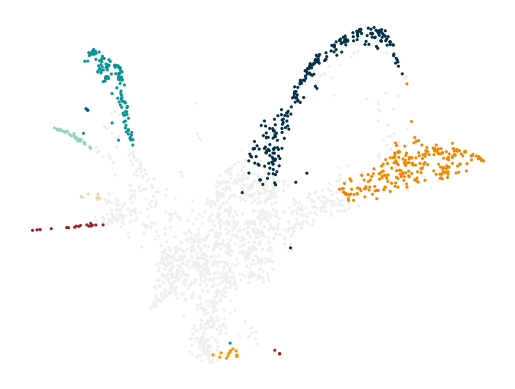

<IPython.core.display.Javascript object>

In [3]:
axes = cp.umap(
    adata_train_subset,
    groupby="Cell type annotation",
    force_zorder={"Undifferentiated": 0},
    cmap=larry_cmap,
    s=5,
)

Text(0.5, 1.0, 'R')

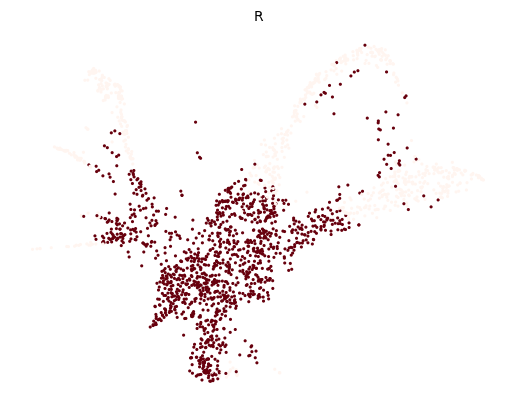

<IPython.core.display.Javascript object>

In [4]:
torch_pba.tl.configure_R(adata_train_subset)
axes = cp.umap(adata_train_subset, c=adata_train_subset.obs["R"], s=5, cmap="Reds")
axes[0].set_title("R", fontsize=10)


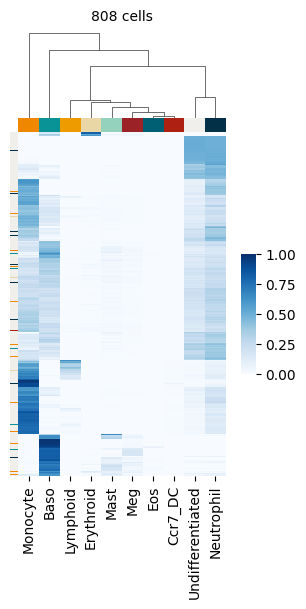

<IPython.core.display.Javascript object>

In [6]:
torch_pba.pl.fate_bias_clustermap(adata_train_subset, subset=("Time point", 2), fate_cmap=larry_cmap)


In [12]:
import ABCParse


class F_hat_mapped(ABCParse.ABCParse):
    def __init__(self, *args, **kwargs):
        self.__parse__(locals())

    @property
    def train_graph(self):
        if not hasattr(self, "_train_graph"):
            self._train_graph = annoyance.kNN(self._adata_train)
            self._train_graph.build()
        return self._train_graph

    @property
    def fates(self):
        return self._adata_train.uns["fates"]

    @property
    def X_fate(self):
        return self._adata_train.obsm["fate_bias"]

    @property
    def F_hat_train(self):
        return pd.DataFrame(self.X_fate, columns=self.fates)

    def _per_cell_fate(self, group_df):
        return group_df.drop("idx", axis=1).mean()

    def map_test_adata(self, adata_test, use_key: str = "X_pca"):
        """"""
        test_idx = adata_test.obs.index

        X_test = adata_test.obsm[use_key].toarray()
        X_test_nn = self.train_graph.query(X_test)

        # using knn, map F_hat_train to the test set cells
        F_hat_pred = self.F_hat_train.iloc[X_test_nn.flatten()]
        fate_pred_idx = np.repeat(test_idx, 20)
        # -- do one where you leave undiff
        _F_hat_pred = larry.utils.row_norm_df(F_hat_pred)
        _F_hat_pred["idx"] = fate_pred_idx
        self.F_hat_unfilt = _F_hat_pred.groupby("idx").apply(self._per_cell_fate)

        # -- drop undiff
        F_hat_pred_norm = larry.utils.row_norm_df(
            F_hat_pred.drop("Undifferentiated", axis=1)
        )
        F_hat_pred_norm["idx"] = fate_pred_idx

        return F_hat_pred_norm.groupby("idx").apply(self._per_cell_fate)

    def __call__(self, adata_train, adata_test, *args, **kwargs):

        self.__update__(locals(), public=[None])

        return self.map_test_adata(adata_test=adata_test)


def compose_test_adata(adata):

    fb_data = larry.tl.fetch_fate_bias_data()
    fate_df = fb_data["fate_df"].copy()
    fate_df = fate_df[fate_df.sum(1) > 0]
    fate_df.index = adata.obs.loc[adata.obs["Time point"] == 2].index[
        fate_df.index.to_numpy()
    ]
    return adata[fate_df.index]


def process_f_hat(adata_train, adata_test):

    f_hat_mapped = F_hat_mapped()
    F_hat = f_hat_mapped(adata_train=adata_train, adata_test=adata_test)
    return F_hat, f_hat_mapped.F_hat_unfilt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
F_hat

,Monocyte,Baso,Neutrophil,Ccr7_DC,Meg,Mast,Eos,Lymphoid,Erythroid,pDC
idx,,,,,,,,,,
13199,0.332671,0.097493,0.468944,0.062060,0.007061,1.461245e-03,3.634195e-03,4.718109e-06,2.666590e-02,4.040322e-06
13210,0.240298,0.233701,0.458320,0.047551,0.004949,1.244927e-03,9.117619e-03,4.759685e-06,4.810760e-03,3.737733e-06
13226,0.003193,0.597652,0.156438,0.001025,0.040458,5.974348e-02,1.973199e-02,3.472993e-10,1.217598e-01,1.434580e-10
13235,0.002561,0.665621,0.127608,0.000825,0.035390,8.748653e-02,2.070917e-02,2.773833e-10,5.979929e-02,1.044276e-10
13256,0.251534,0.000011,0.703603,0.036767,0.008084,5.540647e-13,3.794664e-07,2.258391e-16,6.965785e-13,3.695753e-08
...,...,...,...,...,...,...,...,...,...,...
69313,0.014641,0.568106,0.248585,0.003877,0.061089,4.176152e-02,1.948048e-02,2.085885e-06,4.245662e-02,1.291179e-06
69317,0.129118,0.101981,0.736685,0.024360,0.003628,1.143456e-04,3.963390e-03,2.053406e-07,1.489504e-04,3.105108e-07
69322,0.270060,0.000175,0.681055,0.041094,0.007610,1.574231e-09,5.916687e-06,5.629349e-12,4.793197e-09,7.932484e-08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
F_hat

idx
13199    1.0
13210    1.0
13226    1.0
13235    1.0
13256    1.0
        ... 
69313    1.0
69317    1.0
69322    1.0
69324    1.0
69326    1.0
Length: 2081, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
pr = larry.tasks.fate_prediction.metrics.MultiClassPrecisionRecall(threshold=0.2)

<IPython.core.display.Javascript object>

In [26]:
pr_res = pr(F_obs=F_obs, F_hat=F_hat_test_processed)

<IPython.core.display.Javascript object>

In [14]:
acc = larry.tasks.fate_prediction.metrics.multi_idx_accuracy(
    F_obs, F_hat_test_processed
)
nce = larry.tasks.fate_prediction.metrics.multi_idx_negative_cross_entropy(
    F_obs, F_hat_test_processed
)

<IPython.core.display.Javascript object>

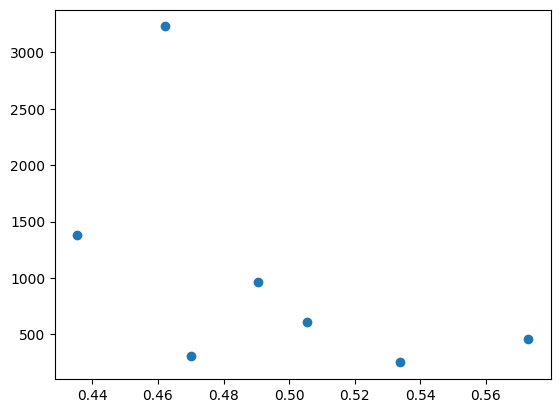

<IPython.core.display.Javascript object>

In [15]:
plt.scatter(acc["accuracy"], nce["nce"])

In [15]:
import sklearn.metrics

<IPython.core.display.Javascript object>

,nce
all,3063.858875
unique_train.N/M,466.942512
unique_train.N/M-early,273.969308
unique_train.all_fates,908.752395
unique_test.N/M,604.658550
unique_test.N/M-early,337.441183
unique_test.all_fates,1342.246813


<IPython.core.display.Javascript object>

In [16]:
accuracy = larry.tasks.fate_prediction.metrics.MultiIndexAccuracyScores(
    
)
path_to_subset_idx = "/home/mvinyard/github/scdiffeq-analyses/analyses/figure2/task_2.fate_prediction/FatePredictionSubsets.pkl"

accuracy(path_to_subset_idx)
acc_df = accuracy.acc_df

AttributeError: module 'larry.tasks.fate_prediction.metrics' has no attribute 'MultiIndexAccuracyScores'

<IPython.core.display.Javascript object>

In [87]:
nce_df = accuracy.nce_df

<IPython.core.display.Javascript object>

In [88]:
nce_df

,nce
unique_train.all_fates,939.043100
unique_train.N/M,436.590387
unique_train.N/M-early,246.456942
unique_test.all_fates,1416.389031
unique_test.N/M,574.941089
unique_test.N/M-early,306.074770


<IPython.core.display.Javascript object>

In [ ]:
larry.tasks.fate_prediction.metrics.

In [81]:
xticklabels = acc_df.index.tolist()

<IPython.core.display.Javascript object>

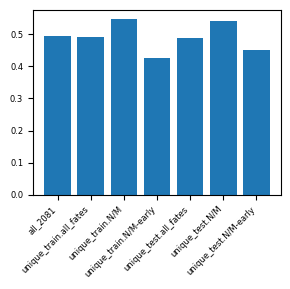

<IPython.core.display.Javascript object>

In [86]:
fig, axes = cp.plot(1, 1, height=0.5, width=0.5)
axes[0].bar(range(len(acc_df)), acc_df["acc"])
axes[0].set_xticks(np.arange(len(xticklabels)))
xtl = axes[0].set_xticklabels(xticklabels, fontsize=6, rotation=45, ha="right")

In [ ]:


G.idx.get_nns_by_vector()

In [9]:
clonal = adata.obs["clone_idx"].dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
train_clone_idx = adata[adata.obs["Well"] == 1].obs["clone_idx"].dropna().unique()
test_clone_idx = adata[adata.obs["Well"] == 2].obs["clone_idx"].dropna().unique()

all_clones = np.unique(clonal.values).astype(int)


in_train = clonal.loc[clonal.isin(train_clone_idx)].unique().astype(int)
in_test = clonal.loc[clonal.isin(test_clone_idx)].unique().astype(int)

<IPython.core.display.Javascript object>

clonal_df = pd.Series(all_clones, name="clone").to_frame()
clonal_df["train"] = clonal_df["clone"].isin(in_train)
clonal_df["test"] = clonal_df["clone"].isin(in_test)

In [82]:
clonal_df["unique"] = clonal_df[["train", "test"]].sum(1) == 1

<IPython.core.display.Javascript object>

In [87]:
clonal_df["unique_train"] = clonal_df[["unique", "train"]].all(1)
clonal_df["unique_test"] = clonal_df[["unique", "test"]].all(1)

<IPython.core.display.Javascript object>

In [90]:
clonal_df.loc[clonal_df["unique_train"]]

,clone,train,test,unique,unique_train,unique_test
0,0,True,False,True,True,False
3,3,True,False,True,True,False
4,4,True,False,True,True,False
6,6,True,False,True,True,False
9,9,True,False,True,True,False
...,...,...,...,...,...,...
5827,5827,True,False,True,True,False
5838,5838,True,False,True,True,False
5839,5839,True,False,True,True,False
5849,5849,True,False,True,True,False


<IPython.core.display.Javascript object>

In [5]:
# clonal_df.loc[clonal_df["unique_test"]]

<IPython.core.display.Javascript object>

In [6]:
# adata.obs.loc[adata.obs["fate_observed"]].loc[adata.obs["Time point"] == 2].loc[
#     adata.obs["Cell type annotation"] == "Undifferentiated"
# ].loc[adata.obs["t0_fated"] == True]

<IPython.core.display.Javascript object>

In [37]:
F_hat = adata_train_subset.obsm["fate_bias"]
cols = adata_train_subset.uns["fates"]
F_hat = pd.DataFrame(F_hat, columns=cols)

<IPython.core.display.Javascript object>

In [42]:
import seaborn as sns

<IPython.core.display.Javascript object>

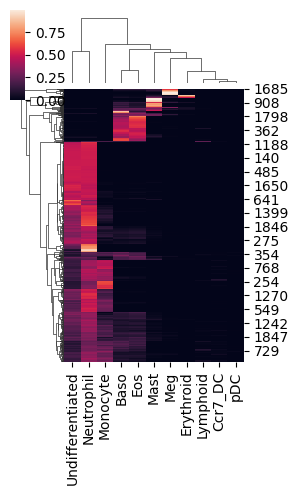

<IPython.core.display.Javascript object>

In [45]:
sns.clustermap(F_hat, figsize=(3, 5))

array([[5.58269650e-03, 4.21498632e-01, 5.43321234e-03, ...,
        4.96909957e-01, 1.86959676e-06, 8.15565215e-07],
       [1.73854523e-09, 4.65311110e-01, 1.61594792e-09, ...,
        5.34684755e-01, 1.18958026e-14, 1.25312530e-15],
       [5.30972759e-01, 3.32161789e-32, 4.69027241e-01, ...,
        7.28866710e-32, 2.53943404e-21, 1.81193790e-29],
       ...,
       [1.25944442e-04, 1.36426681e-01, 1.17101834e-04, ...,
        7.59650515e-02, 7.52384033e-10, 2.54121654e-10],
       [5.12667935e-01, 1.63746282e-16, 4.87332065e-01, ...,
        3.61014855e-16, 7.72077106e-21, 2.02405999e-24],
       [1.12666760e-01, 2.04178831e-01, 2.65952634e-01, ...,
        1.85623960e-01, 9.60121995e-03, 3.14387821e-04]])

<IPython.core.display.Javascript object>

In [28]:
adata[adata.obs["test"] == True]

View of AnnData object with n_obs × n_vars = 85076 × 2447
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train', 'test'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_scaled'

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Potential (V)')

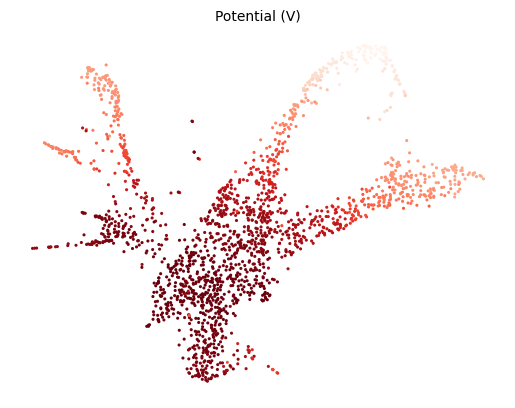

<IPython.core.display.Javascript object>

In [14]:
axes = cp.umap(adata_train_subset, c=adata_train_subset.obs["V"], s=5, cmap="Reds")
axes[0].set_title("Potential (V)", fontsize=10)

In [ ]:
torch_pba.pl.umap(
    adata_train_subset,
    c="V"
)

In [7]:
import adata_query
import matplotlib.cm as cm
import cellplots
# celltypes = list(adata.obs['Cell type annotation'].unique())
# cellplots.umap

In [1]:

import anndata as a
import pandas as pd
import matplotlib.pyplot as plt
import vinplots # pip install vinplots==0.0.75

adata = a.read_h5ad("./adata.task_02.Weinreb2020.h5ad")

adata_train = adata[adata.obs['train']].copy()
adata_train

AnnData object with n_obs × n_vars = 74060 × 2447
    obs: 'Time point', 'Population', 'Annotation', 'Well', 'cell_idx', 'clone_idx', 'early_cells', 'early_neu_mo', 'neu_mo_mask', 'neu_vs_mo_pct', 'group', 'W', 'train', 'test'
    obsm: 'X_pca', 'X_umap'
    layers: 'X_scaled'

In [2]:
adata_train_subset = adata[adata_train.obs.sample(20_000).index].copy()

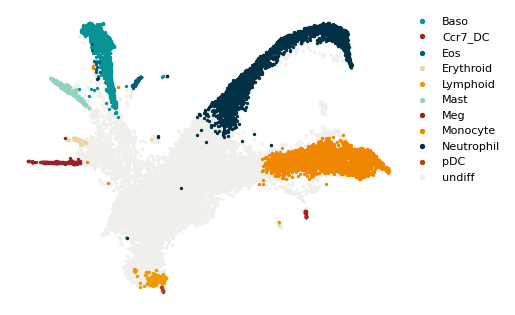

In [3]:
torch_pba.pl.umap(
    adata_train_subset,
    groupby="Annotation",
    zorder_preset={"undiff": 0},
    c=vinplots.colors.LARRY_in_vitro,
)

In [4]:
adata_train_subset.obs = adata_train_subset.obs.reset_index()
adata_train_subset.obs.index = adata_train_subset.obs.index.astype(str)
torch_pba.tl.configure_R(adata_train_subset)

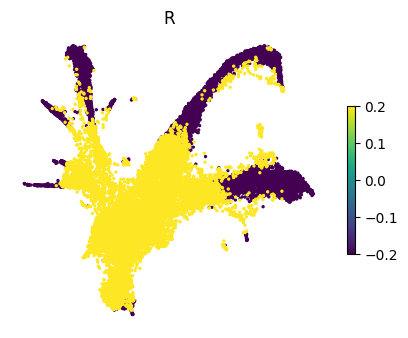

In [5]:
torch_pba.pl.umap(
    adata_train_subset,
    c="R"
)

In [6]:
from annoyance import kNN

G = kNN(adata_train_subset)
G.build()

In [7]:
pba = torch_pba.PBA(adata_train_subset)
pba.build_kNN(graph_idx=G.idx)

 - [NOTE] | Configuring provided graph index


  0%|          | 0/20000 [00:00<?, ?it/s]

 - [NOTE] | Generating edge list


  0%|          | 0/20000 [00:00<?, ?it/s]

In [8]:
pba.compute_Laplacian()

 - [NOTE] | Computing adjacency matrix
 - [NOTE] | Configuring identity matrix
 - [NOTE] | Computing row sum normalization of adjacency matrix


In [9]:
pba.compute_potential()

 - [NOTE] | Computing pseudo-inverse of the Laplacian
 - [NOTE] | Pseudo-inversion computed over 1374.591s with torch
 - [NOTE] | Computing dot product w.r.t. R to obtain potential


In [10]:
torch_pba.tl.configure_S(adata=adata_train_subset)

In [11]:
adata_train_subset

AnnData object with n_obs × n_vars = 20000 × 2447
    obs: 'index', 'Time point', 'Population', 'Annotation', 'Well', 'cell_idx', 'clone_idx', 'early_cells', 'early_neu_mo', 'neu_mo_mask', 'neu_vs_mo_pct', 'group', 'W', 'train', 'test', 'R', 'V'
    uns: 'edges', 'fates'
    obsm: 'X_pca', 'X_umap', 'S'
    layers: 'X_scaled'
    obsp: 'adjacency', 'Laplacian'

In [12]:
adata_train_subset.write_h5ad("./adata.task_02.Weinreb2020.PBA_outs.h5ad")

In [13]:
pba.compute_fate_bias()

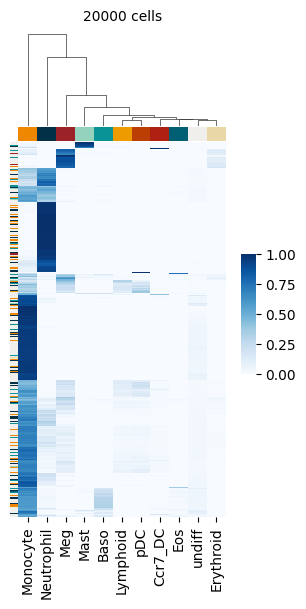

In [14]:
torch_pba.pl.fate_bias_clustermap(adata_train_subset, subset=None)

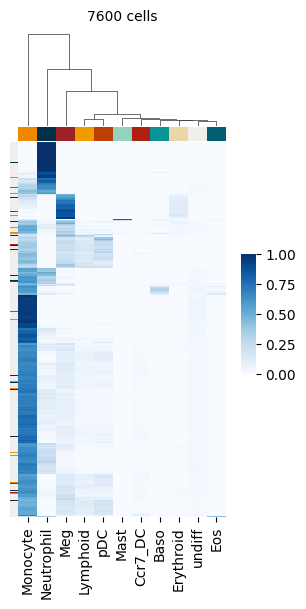

In [17]:
torch_pba.pl.fate_bias_clustermap(adata_train_subset, subset=('Time point', 2))

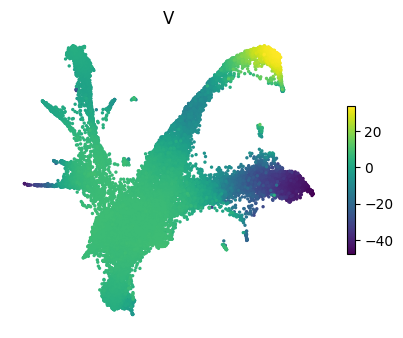

In [18]:
torch_pba.pl.umap(
    adata_train_subset,
    c="V"
)

In [19]:
fate_df = pd.DataFrame(adata_train_subset.obsm['fate_bias'], columns=adata_train_subset.uns['fates'])
adata_train_subset.obs['fate'] = fate_df.idxmax(1).values

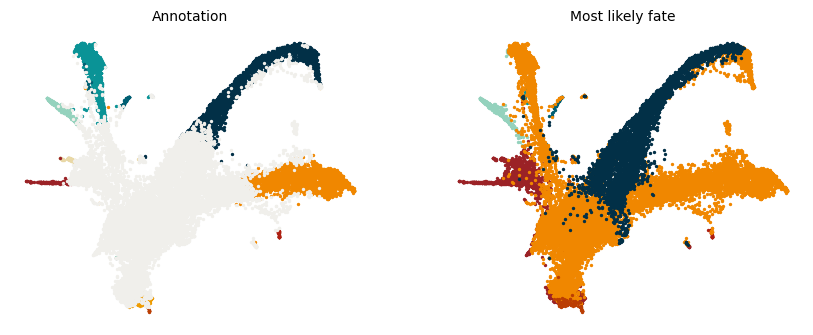

In [20]:
fig, axes = vinplots.quick_plot(nplots=2, ncols=2, rm_ticks=True, spines_to_delete="all", figsize=0.8, wspace=0.2)
ax0, ax1 = axes[0], axes[1]

grouped = adata_train_subset.obs.groupby("Annotation")
for group, group_df in grouped:
    idx = group_df.index
    xu = adata_train_subset[idx].obsm['X_umap']
    ax0.scatter(xu[:,0], xu[:,1], c = vinplots.colors.LARRY_in_vitro[group], s = 2)
    ax0.set_title("Annotation", fontsize=10)

grouped = adata_train_subset.obs.groupby("fate")
for group, group_df in grouped:
    idx = group_df.index
    xu = adata_train_subset[idx].obsm['X_umap']
    ax1.scatter(xu[:,0], xu[:,1], c = vinplots.colors.LARRY_in_vitro[group], s = 2)
    ax1.set_title("Most likely fate", fontsize=10)

In [22]:
adata_train_subset.write_h5ad("./adata.task_02.Weinreb2020.PBA_outs.h5ad")
adata_train_subset

AnnData object with n_obs × n_vars = 20000 × 2447
    obs: 'index', 'Time point', 'Population', 'Annotation', 'Well', 'cell_idx', 'clone_idx', 'early_cells', 'early_neu_mo', 'neu_mo_mask', 'neu_vs_mo_pct', 'group', 'W', 'train', 'test', 'R', 'V', 'fate'
    uns: 'edges', 'fates'
    obsm: 'X_pca', 'X_umap', 'S', 'fate_bias'
    layers: 'X_scaled'
    obsp: 'adjacency', 'Laplacian'